In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def first_explicit(a, b, k, f, g1, g2, phi, T, h, st):
    t = int(T/st) + 1
    x = int((b-a) / h) + 1
    x_lin = np.linspace(a, b, x)
    t_lin = np.linspace(0, T, t)
    matrix = np.zeros((t, x))
    matrix[0, ] = [phi(x) for x in x_lin]
    matrix[:, 0] = [g1(t) for t in t_lin]
    
    for i in range(t - 1):
        for j in range(1, x - 1):            
            matrix[i + 1, j] = (k*st/h**2*matrix[i, j-1] + (1-2*k*st/h**2)*matrix[i, j] + k*st/h**2*matrix[i, j+1] + st*f(x_lin[j], t_lin[i]))
        matrix[i + 1, -1] = matrix[i + 1, -2] + h*g2(t_lin[i + 1])
    return x_lin, t_lin, matrix

In [8]:
def second_explicit(a, b, k, f, g1, g2, phi, T, h, st):
    t = int(T/st) + 1
    x = int((b-a) / h) + 1
    x_lin = np.linspace(a, b, x)
    t_lin = np.linspace(0, T, t)
    matrix = np.zeros((t, x))
    matrix[0, ] = [phi(x) for x in x_lin]
    matrix[:, 0] = [g1(t) for t in t_lin]

    for i in range(t - 1):
        for j in range(1, x - 1):            
            matrix[i + 1, j] = (k*st/h**2*matrix[i, j-1] + (1-2*k*st/h**2)*matrix[i, j] + k*st/h**2*matrix[i, j+1] + st*f(x_lin[j], t_lin[i]))
        matrix[i + 1, -1] = (matrix[i, -1] + 2*k*st*(matrix[i, -2] + h*g2(t_lin[i]) - matrix[i, -1])/h**2 + st*f(b, t_lin[i]))
    return x_lin, t_lin, matrix

In [9]:
a, b = 0, 1
k = 0.1
h = (b-a) / 9
T = 0.5
st = 0.5*h**2/(4*k)

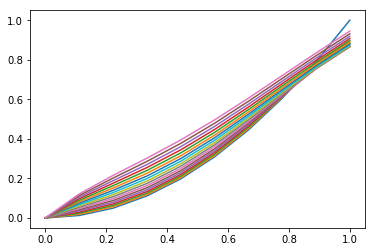

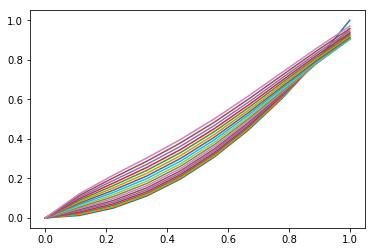

In [11]:
x, t, matrix = first_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
for i in range(0, len(matrix), 2):
    plt.plot(x, matrix[i])
plt.show()
x, t, matrix = second_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
for i in range(0, len(matrix), 2):
    plt.plot(x, matrix[i])
plt.show()

In [12]:
def first_implicit(a, b, k, f, g1, g2, phi, T, h, st):
    t = int(T/st) + 1
    x = int((b-a) / h) + 1
    x_lin = np.linspace(a, b, x)
    t_lin = np.linspace(0, T, t)
    matrix = np.zeros((t, x))
    matrix[0, ] = [phi(x) for x in x_lin]
    matrix[:, 0] = [g1(t) for t in t_lin]

    tmp = np.zeros((x, x))
    tmp[0, 0] = 1
    tmp[-1, -1] = 1
    tmp[-1, -2] = -1
    for i in range(1, x - 1):   
        tmp[i, i-1] = -k*st/h**2
        tmp[i, i] = 1 + 2*st*k/h**2
        tmp[i, i+1] = -k*st/h**2
        
    for i in range(1, t):
        b = np.array([st*f(l, t_lin[i]) for l in x_lin]) + matrix[i - 1]
        b[0] = g1(t_lin[i])
        b[-1] = h*g2(t_lin[i])
        matrix[i] = np.linalg.solve(tmp, b)
    return x_lin, t_lin, matrix


In [13]:
def second_implicit(a, b, k, f, g1, g2, phi, T, h, st):
    t = int(T/st) + 1
    x = int((b-a) / h) + 1
    x_lin = np.linspace(a, b, x)
    t_lin = np.linspace(0, T, t)
    matrix = np.zeros((t, x))
    matrix[0, ] = [phi(x) for x in x_lin]
    matrix[:, 0] = [g1(t) for t in t_lin]
    
    tmp = np.zeros((x + 1, x + 1))
    tmp[0, 0] = 1
    tmp[-1, -1] = 1
    tmp[-1, -3] = -1
    for i in range(1, x):   
        tmp[i, i-1] = -k*st/h**2
        tmp[i, i] = 1 + 2*st*k/h**2
        tmp[i, i+1] = -k*st/h**2
        
    for i in range(1, t):
        b = np.zeros(x+1)
        b[1:-1] = [st*f(l, t_lin[i]) for l in x_lin[1:]] + matrix[i - 1, 1:]
        b[0] = g1(t_lin[i])
        b[-1] = 2*h*g2(t_lin[i])
        matrix[i] = np.linalg.solve(tmp, b)[:-1]
    return x_lin, t_lin, matrix

In [14]:
a, b = 0, 1
k = 0.1
h = (b-a) / 9
T = 0.5
st = 0.5*h**2/(4 * k)

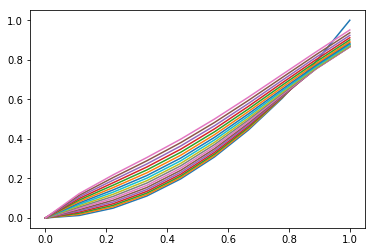

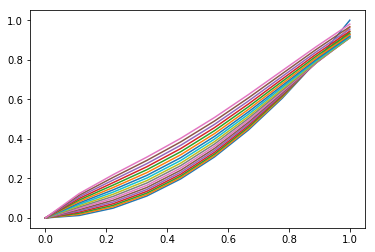

In [15]:
x, t, matrix = first_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
for i in range(0, len(matrix), 2):
    plt.plot(x, matrix[i])
plt.show()
x, t, matrix = second_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
for i in range(0, len(matrix), 2):
    plt.plot(x, matrix[i])
plt.show()

In [45]:
def solver(h, st, flg):
    if flg:
        return first_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
    else:
        return first_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
def find_diff_first(h, st, i, flg):
    if flg:
        _,_, A = first_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        st /= 2
        _,_, B = first_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        return A[i] - B[2*i]
    else:
        _,_, A = first_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        st /= 2
        _,_, B = first_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        return A[i] - B[2*i]
    return -1
def output_first(t_1, t_2, n, h, st, flg):
    print('h | tau | mx1 | mx2')
    for i in range(n):
        i_1 = int(t_1/st)
        i_2 = int(t_2/st)
        mx_1 = max(abs(find_diff_first(h, st, i_1, flg)))
        mx_2 = max(abs(find_diff_first(h, st, i_2, flg)))
        st /= 2
        print('{0} | {1} | {2} | {3}'.format(h, st, mx_1, mx_2))
def find_diff_second(h, st, i, flg):
    if flg:
        _,_, A = second_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        st /= 2
        _,_, B = second_explicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        return A[i] - B[2*i]
    else:
        _,_, A = second_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        st /= 2
        _,_, B = second_implicit(a, b, k, lambda x,t: t, lambda _: 0, lambda _: 1, lambda x: x**2, T, h, st)
        return A[i] - B[2*i]
    return -1
def output_second(t_1, t_2, n, h, st, flg):
    print('h | tau | mx1 | mx2')
    for i in range(n):
        i_1 = int(t_1/st)
        i_2 = int(t_2/st)
        mx_1 = max(abs(find_diff_second(h, st, i_1, flg)))
        mx_2 = max(abs(find_diff_second(h, st, i_2, flg)))
        st /= 2
        print('{0} | {1} | {2} | {3}'.format(h, st, mx_1, mx_2))

In [46]:
a, b = 0, 1
k = 0.1
h = 0.1
T = 0.5
t_1 = 0.01
t_2 = 0.2
st = 0.01

In [47]:
output_first(t_1,t_2,10,h,st,0)

h | tau | mx1 | mx2
0.1 | 0.005 | 0.00018323130839659196 | 0.0008970450456509127
0.1 | 0.0025 | 9.776766880043031e-05 | 0.0004497745062407299
0.1 | 0.00125 | 5.062658951937582e-05 | 0.00022519040172086502
0.1 | 0.000625 | 2.5779109621315577e-05 | 0.00011266970882284344
0.1 | 0.0003125 | 1.3010117145606515e-05 | 5.635331889408679e-05
0.1 | 0.00015625 | 6.535736459700736e-06 | 2.818125503634139e-05
0.1 | 7.8125e-05 | 3.2756064340944135e-06 | 1.4091773927193962e-05
0.1 | 3.90625e-05 | 1.6397464535078399e-06 | 7.046173154390267e-06
0.1 | 1.953125e-05 | 8.20360143594101e-07 | 3.5231583545014544e-06
0.1 | 9.765625e-06 | 4.103020292411941e-07 | 1.7615986165342434e-06


In [48]:
output_first(t_1,t_2,10,h,st,1)

h | tau | mx1 | mx2
0.1 | 0.005 | 0.004474999999999896 | 0.0008484799299504076
0.1 | 0.0025 | 0.0020715625000005122 | 0.00042058554833279693
0.1 | 0.00125 | 0.0010013031405960993 | 0.00020938656760405294
0.1 | 0.000625 | 0.0004927115656661041 | 0.00010446763466698261
0.1 | 0.0003125 | 0.00024444662801270667 | 5.217751664876591e-05
0.1 | 0.00015625 | 0.00012175500892686042 | 2.607469707704979e-05
0.1 | 7.8125e-05 | 6.0761521990415623e-05 | 1.3033834924125465e-05
0.1 | 3.90625e-05 | 3.035190032529833e-05 | 6.516039078863223e-06
0.1 | 1.953125e-05 | 1.516875176366117e-05 | 3.2578001245564536e-06
0.1 | 9.765625e-06 | 7.582578417042463e-06 | 1.628845963774772e-06


In [49]:
output_second(t_1,t_2,10,h,st,0)

h | tau | mx1 | mx2
0.1 | 0.005 | 0.0006186077145504676 | 0.0010674446643587077
0.1 | 0.0025 | 0.0003428623407338849 | 0.0005331327481676862
0.1 | 0.00125 | 0.00018129997014182386 | 0.0002664040209193752
0.1 | 0.000625 | 9.334315107989433e-05 | 0.0001331599710316933
0.1 | 0.0003125 | 4.737633258755647e-05 | 6.656932396942317e-05
0.1 | 0.00015625 | 2.3868516046077204e-05 | 3.328197952334744e-05
0.1 | 7.8125e-05 | 1.197988066403699e-05 | 1.664031723669357e-05
0.1 | 3.90625e-05 | 6.001413864864524e-06 | 8.319990148941692e-06
0.1 | 1.953125e-05 | 3.0035838772812795e-06 | 4.1599532337732725e-06
0.1 | 9.765625e-06 | 1.5025123578649158e-06 | 2.0799678875915717e-06


In [50]:
output_second(t_1,t_2,10,h,st,1)

h | tau | mx1 | mx2
0.1 | 0.005 | 0.0010250000000000536 | 0.0010621228290156326
0.1 | 0.0025 | 0.00043906250000003144 | 0.0005317641981709142
0.1 | 0.00125 | 0.00020503949290184842 | 0.00026605947475100145
0.1 | 0.000625 | 9.925900382157238e-05 | 0.00013307368356474392
0.1 | 0.0003125 | 4.885411231170256e-05 | 6.654774262604413e-05
0.1 | 0.00015625 | 2.423788710437247e-05 | 3.327658361851338e-05
0.1 | 7.8125e-05 | 1.2072218808278912e-05 | 1.6638968168392054e-05
0.1 | 3.90625e-05 | 6.024498116263821e-06 | 8.31965307290794e-06
0.1 | 1.953125e-05 | 3.0093549073795245e-06 | 4.15986865232032e-06
0.1 | 9.765625e-06 | 1.5039549940976116e-06 | 2.079944366073505e-06
